<a href="https://colab.research.google.com/github/huyenmuro/Data-Analyst/blob/main/PRICE_HOUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT VÀ KIỂM TRA DATA

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Import file pricehouse

In [ ]:
import pandas as pd
pricehouse=pd.read_csv('/content/drive/MyDrive/DATA ANALYST/price_house.csv')
pricehouse.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


dùng info() để xem thông tin kiểu dữ liệu

In [ ]:
pricehouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

# CÁC KIỂU DỮ LIỆU BỊ SAI VÀ THAY THẾ:
*   YearBuild float64 phải là date
*   lastSaleDate object phải là date
*   priorSaleDate object phải là date









Đổi lại các kiểu dữ liệu

In [ ]:
pricehouse['yearBuilt']=pd.to_datetime(pricehouse['yearBuilt'],format='%Y')
pricehouse['lastSaleDate']=pd.to_datetime(pricehouse['lastSaleDate'],format='%Y-%m-%d')
pricehouse['priorSaleDate']=pd.to_datetime(pricehouse['priorSaleDate'],format='%Y-%m-%d')

In [ ]:
pricehouse['bedrooms']=pricehouse['bedrooms'].astype('float64')
pricehouse['rooms']=pricehouse['rooms'].astype('float64')
pricehouse['lastSaleAmount']=pricehouse['lastSaleAmount'].astype('float64')

Kiểm tra lại kiểu dữ liệu

In [ ]:
pricehouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               15000 non-null  int64         
 1   address          15000 non-null  object        
 2   city             15000 non-null  object        
 3   state            15000 non-null  object        
 4   zipcode          15000 non-null  int64         
 5   latitude         14985 non-null  float64       
 6   longitude        14985 non-null  float64       
 7   bedrooms         15000 non-null  float64       
 8   bathrooms        15000 non-null  float64       
 9   rooms            15000 non-null  float64       
 10  squareFootage    15000 non-null  int64         
 11  lotSize          15000 non-null  int64         
 12  yearBuilt        14999 non-null  datetime64[ns]
 13  lastSaleDate     15000 non-null  datetime64[ns]
 14  lastSaleAmount   15000 non-null  float

# CÓ 2 CĂN NHÀ CÙNG ĐỊA CHỈ KHÔNG?
Cột address có tổng số 15000 giá trị nhưng chỉ có 14998 giá trị không trùng nhau, như vậy có 2 căn nhà có địa chỉ bị lặp lại trong bảng.

In [ ]:
pricehouse.describe(include='object')

,address,city,state
count,15000,15000,15000
unique,14998,1,1
top,3118 N Vine St,Denver,CO
freq,2,15000,15000


Xem thông tin 2 căn có địa chỉ giống nhau là "3118 N Vine St". Có 1 dòng không có thông tin latitude và longitude => xóa căn này

In [ ]:
pricehouse[pricehouse['address'] == '3118 N Vine St']

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
4762,248507008,3118 N Vine St,Denver,CO,80205,NaN,NaN,4.0,4.0,8.0,1908,4685,2012-01-01,2013-02-21,425000.0,NaT,NaN,670436
4764,216346608,3118 N Vine St,Denver,CO,80205,39.761214,-104.961873,4.0,4.0,8.0,1908,4685,2012-01-01,2013-02-21,425000.0,NaT,NaN,671744


**Tạo copy của Pricehouse để xử lý không ảnh hưởng dữ liệu gốc**

In [ ]:
pricehouse2=pricehouse.copy()

**Xóa 1 căn trong số 2 căn trùng nhau**

In [ ]:
pricehouse2=pricehouse2.drop(labels=4762,axis=0)

In [ ]:
display(pricehouse2.loc[4762:4763,:])

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
4763,16274826,3209 N Marion St,Denver,CO,80205,39.762427,-104.972474,3.0,3.0,6.0,1908,3140,1886-01-01,2016-01-28,430000.0,2013-08-28,381500.0,564513


Reset lại chỉ mục và xóa cột chỉ mục cũ

In [ ]:
pricehouse2=pricehouse2.reset_index()

In [ ]:
pricehouse2=pricehouse2.drop(columns=['index'])

Kiểm tra lại kết quả

In [ ]:
pricehouse2.describe(include='object')

,address,city,state
count,14999,14999,14999
unique,14998,1,1
top,3650 N Adams St,Denver,CO
freq,2,14999,14999


Xem thông tin 2 căn có địa chỉ giống nhau "3650 N Adams St". Tuy nhiên 2 dòng này có địa chỉ giống nhau nhưng số lượng phòng, diện tích, thời gian xây dựng => Đây là 2 căn nhà khác nhau được xây dựng lần lượt trên cùng mảnh đất, giữ nguyên không xóa thông tin.

In [ ]:
pricehouse2[pricehouse2['address'] == '3650 N Adams St']

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
3274,320948074,3650 N Adams St,Denver,CO,80205,NaN,NaN,4.0,4.0,7.0,2826,4690,2016-01-01,2017-05-23,735000.0,NaT,NaN,745537
6144,4277764,3650 N Adams St,Denver,CO,80205,NaN,NaN,1.0,1.0,3.0,472,9370,1926-01-01,2015-07-20,250000.0,NaT,NaN,745483


# LASTSALEAMOUNT CÓ LỚN HƠN PREIORSALEAMOUNT?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
LSA = pricehouse2['lastSaleAmount']
PSA = pricehouse2['priorSaleAmount']
pricehouse2.loc[(LSA>PSA) & (PSA>0)]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3.0,5.0,7.0,2051,6045,1996-01-01,2006-09-12,363500.0,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4.0,4.0,8.0,2051,6315,1997-01-01,2014-12-15,420000.0,2006-07-07,345000.0,514953
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3.0,3.0,7.0,2051,8133,1997-01-01,2004-03-15,328700.0,1998-04-09,225200.0,494321
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3.0,3.0,0.0,2054,4050,2007-01-01,2015-12-01,407000.0,2012-10-30,312000.0,424514
10,39811456,6700 W Dorado Dr # 11,Denver,CO,80123,39.614540,-105.071350,3.0,4.0,7.0,2568,6397,2000-01-01,2014-11-12,638000.0,2005-03-22,530000.0,721350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,42985979,1016 S Emerson St,Denver,CO,80209,39.698090,-104.976608,3.0,2.0,6.0,1913,4760,1909-01-01,2017-05-31,600000.0,2013-06-07,535000.0,694981
14993,150304831,376 S High St,Denver,CO,80209,39.709681,-104.964860,3.0,2.0,7.0,1913,4990,1925-01-01,2015-09-10,815000.0,1994-05-06,142000.0,784955
14995,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3.0,3.0,11.0,2937,4500,1890-01-01,2015-03-05,645000.0,2012-07-23,557500.0,807306
14997,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3.0,4.0,10.0,3193,4970,2005-01-01,2011-08-10,1350000.0,2004-12-07,405000.0,2008794


Có 9054 căn nhà có Last Sale Amount lớn hơn Prior Sale Amount

In [ ]:
pricehouse2.loc[LSA < PSA]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3.0,2.0,6.0,1378,9968,2003-01-01,2009-12-17,75000.0,2004-05-13,165700.0,239753
38,39868648,5535 S Fenton St,Denver,CO,80123,39.617145,-105.060195,4.0,3.0,8.0,2365,6050,1998-01-01,2004-02-08,335000.0,2001-05-08,339950.0,504705
44,3523919,5425 S Gray St,Denver,CO,80123,39.618265,-105.061397,3.0,3.0,7.0,1860,6838,1998-01-01,2005-06-23,295000.0,2004-07-26,300000.0,475615
67,10173490,4633 S Dudley St,Denver,CO,80123,39.632566,-105.095517,2.0,2.0,5.0,1892,7100,1979-01-01,2011-11-16,221000.0,2006-10-19,231000.0,357373
81,19932183,4859 S Hoyt St,Denver,CO,80123,39.628993,-105.105872,3.0,2.0,5.0,1402,6500,1982-01-01,2008-06-06,185000.0,2001-06-18,205000.0,338012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14799,14349286,330 S Pennsylvania St,Denver,CO,80209,39.710529,-104.981214,2.0,2.0,4.0,1388,3120,1895-01-01,2012-12-19,369000.0,2010-07-02,379000.0,543262
14819,3455176,926 S York St,Denver,CO,80209,39.699607,-104.960256,2.0,2.0,6.0,1133,4690,1921-01-01,2005-11-25,245000.0,2005-07-29,325000.0,810850
14891,49097500,900 S Pennsylvania St,Denver,CO,80209,39.700115,-104.981233,5.0,3.0,10.0,1906,5209,1909-01-01,2012-02-08,320400.0,2001-10-15,379900.0,1526583
14910,39856526,706 S Clayton St,Denver,CO,80209,39.703670,-104.954349,4.0,5.0,10.0,3955,6250,2003-01-01,2009-04-14,1050000.0,2004-03-09,1250000.0,1502827


715 căn nhà có giá sale giảm

In [ ]:
pricehouse2.loc[LSA == PSA]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
29,18922140,5965 W Sumac Ave,Denver,CO,80123,39.615199,-105.062378,3.0,4.0,8.0,2350,6839,1997-01-01,2011-08-11,365000.0,2004-08-04,365000.0,500105
46,19150871,4756 S Perry St,Denver,CO,80123,39.630389,-105.038707,3.0,2.0,5.0,1355,9600,1960-01-01,1999-12-14,153500.0,1999-12-14,153500.0,366187
51,10173489,8501 W Union Ave # 16,Denver,CO,80123,39.631640,-105.093060,3.0,3.0,6.0,1617,6250,1995-01-01,2006-10-20,245000.0,2004-07-21,245000.0,385132
137,184340014,6900 W Grant Ranch Blvd # 48,Denver,CO,80123,39.618343,-105.077086,2.0,3.0,5.0,1714,4497,1999-01-01,1999-11-29,265900.0,NaT,265900.0,482063
216,49467729,541 N Washington St,Denver,CO,80203,39.724882,-104.979095,4.0,2.0,8.0,2067,4687,1891-01-01,2001-08-09,280000.0,2001-08-09,280000.0,631581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14757,147918026,383 S Sherman St,Denver,CO,80209,39.709569,-104.985556,3.0,2.0,5.0,1385,4320,1893-01-01,2000-07-20,330000.0,2000-07-20,330000.0,615565
14769,22862011,880 S High St,Denver,CO,80209,39.700666,-104.964865,2.0,2.0,5.0,1130,4690,1922-01-01,2008-06-03,450000.0,2006-08-03,450000.0,787946
14771,51256974,738 S Gilpin St,Denver,CO,80209,39.703122,-104.967180,3.0,1.0,6.0,1130,4690,1922-01-01,1999-07-19,262000.0,1999-07-19,262000.0,750034
14806,46399747,999 S Euclid Way,Denver,CO,80209,39.698969,-104.955935,3.0,3.0,7.0,2412,8200,1951-01-01,2002-06-24,450600.0,2002-06-24,450600.0,1153061


Có 222 căn nhà có giá bán không thay đổi

In [ ]:
pricehouse2.loc[PSA==0]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4.0,3.0,0.0,2400,11500,1956-01-01,2008-12-02,185000.0,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3.0,4.0,8.0,2305,5600,1998-01-01,2012-07-18,308000.0,2011-12-29,0.0,513676
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3.0,3.0,7.0,1796,5038,1999-01-01,2011-08-16,274900.0,2011-01-10,0.0,496079
41,43174426,4951 S Ammons St,Denver,CO,80123,39.626582,-105.087250,3.0,2.0,8.0,1858,6890,1986-01-01,2012-07-30,231600.0,2012-03-30,0.0,418814
56,17056170,3979 W Chenango Ave,Denver,CO,80123,39.629760,-105.038706,3.0,2.0,5.0,1118,12200,1961-01-01,2009-12-23,171222.0,2009-06-19,0.0,348035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14924,22409145,817 S Sherman St,Denver,CO,80209,39.701547,-104.985422,2.0,1.0,5.0,1140,4160,1885-01-01,2010-10-29,260000.0,2010-05-06,0.0,556794
14932,46375088,554 S Logan St,Denver,CO,80209,39.706511,-104.982462,2.0,3.0,6.0,1908,4430,1927-01-01,2012-01-06,395490.0,2011-09-26,0.0,693058
14964,39599923,51 S Harrison St,Denver,CO,80209,39.715237,-104.941694,2.0,2.0,5.0,887,6250,1925-01-01,2009-12-22,237000.0,2009-08-17,0.0,579135
14967,786671,1033 S Washington St,Denver,CO,80209,39.697715,-104.979560,2.0,2.0,6.0,1143,4160,1900-01-01,2006-12-07,366000.0,2005-11-23,0.0,605270


Có 1296 căn nhà không có giá mua của năm trước

In [ ]:
pricehouse2.loc[PSA.isnull()]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2.0,2.0,6.0,1653,6970,2004-01-01,2004-09-23,216935.0,NaT,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3.0,1.0,0.0,1882,23875,1917-01-01,2008-04-03,330000.0,NaT,NaN,488840
15,184328555,4254 W Monmouth Ave,Denver,CO,80123,39.629000,-105.042330,2.0,2.0,4.0,1297,16600,1962-01-01,2011-11-07,150000.0,NaT,NaN,354031
18,51335315,5655 S Fenton St,Denver,CO,80123,39.615488,-105.060173,3.0,3.0,7.0,2321,6151,1998-01-01,1999-12-02,277900.0,NaT,NaN,504791
19,152799217,5626 S Fenton St,Denver,CO,80123,39.616153,-105.059696,3.0,3.0,7.0,2071,6831,1999-01-01,2000-02-04,271800.0,NaT,NaN,495121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,51037171,420 S Humboldt St,Denver,CO,80209,39.708868,-104.969541,2.0,2.0,5.0,1145,4760,1924-01-01,2000-06-09,334900.0,NaT,NaN,700184
14987,184307468,1001 S Milwaukee Way,Denver,CO,80209,39.697471,-104.951719,2.0,1.0,5.0,1145,5520,1942-01-01,2011-09-26,396000.0,NaT,NaN,691734
14990,19402362,703 S Vine St,Denver,CO,80209,39.703698,-104.963195,3.0,2.0,7.0,1401,6510,1931-01-01,2010-08-30,499900.0,NaT,NaN,900818
14991,184311569,445 S Pearl St,Denver,CO,80209,39.708452,-104.980694,3.0,2.0,8.0,1657,4690,1892-01-01,1998-04-08,81800.0,NaT,NaN,632156


3712 căn nhà chỉ mới bán 1 lần

# TỈ LỆ CÁC NHÓM NHÀ TĂNG GIÁ/GIẢM GIÁ/KHÔNG THAY ĐỔI

Thêm cột pricestatus phân loại tình trạng giá tăng, giảm, không thay đổi, không có giá sale cũ

In [ ]:
conditions=[(PSA.isnull()),(PSA==0),(LSA>PSA),(LSA<PSA),(LSA==PSA)]
values=['1stsale','nullPSA','growth','dropped','unchanged']
pricehouse2['pricestatus']=np.select(conditions,values)
pricehouse2.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,pricestatus
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3.0,2.0,6.0,1378,9968,2003-01-01,2009-12-17,75000.0,2004-05-13,165700.0,239753,dropped
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2.0,2.0,6.0,1653,6970,2004-01-01,2004-09-23,216935.0,NaT,NaN,343963,1stsale
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3.0,1.0,0.0,1882,23875,1917-01-01,2008-04-03,330000.0,NaT,NaN,488840,1stsale
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4.0,3.0,0.0,2400,11500,1956-01-01,2008-12-02,185000.0,2008-06-27,0.0,494073,nullPSA
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3.0,4.0,8.0,2305,5600,1998-01-01,2012-07-18,308000.0,2011-12-29,0.0,513676,nullPSA


In [ ]:
ph1=pricehouse2.groupby(['pricestatus'])['id'].count().reset_index()
ph1.head()

,pricestatus,id
0,1stsale,3712
1,dropped,715
2,growth,9054
3,nullPSA,1296
4,unchanged,222


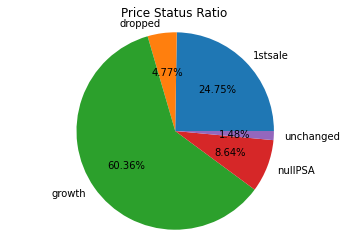

In [ ]:
plt.pie(ph1['id'],labels=ph1['pricestatus'],autopct='%.2f%%')
plt.title('Price Status Ratio')
plt.axis('equal')
plt.show()

Có 60% số căn nhà có giá tăng so với lần Sale trước, 4% có giá giảm và 1% có giá không thay đổi. 25% số căn nhà bán lần đầu tiên và 9% không có giá về lần Sale trước

# Tính tương quan giữa sự thay đổi giá và các đặc tính của căn nhà

Thay thế cá căn nhà mới bán lần đầu có giá trị null ở priorsaleamount bằng 0 để gom cùng với nhóm với các căn nhà không có thông tin giá sale cũ thành nhóm không so sánh giá

In [ ]:
pricehouse2['priorSaleAmount']=np.where(pricehouse2['priorSaleAmount'].isnull(),0,pricehouse2['priorSaleAmount'])
pricehouse2.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,pricestatus
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3.0,2.0,6.0,1378,9968,2003-01-01,2009-12-17,75000.0,2004-05-13,165700.0,239753,dropped
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2.0,2.0,6.0,1653,6970,2004-01-01,2004-09-23,216935.0,NaT,0.0,343963,1stsale
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3.0,1.0,0.0,1882,23875,1917-01-01,2008-04-03,330000.0,NaT,0.0,488840,1stsale
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4.0,3.0,0.0,2400,11500,1956-01-01,2008-12-02,185000.0,2008-06-27,0.0,494073,nullPSA
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3.0,4.0,8.0,2305,5600,1998-01-01,2012-07-18,308000.0,2011-12-29,0.0,513676,nullPSA


Do các căn nhà không có giá Sales kì trước và nhà mới bán lần đầu có priorsale bằng 0 gây sai lệch ý nghĩa differenceprice nên drop các dòng này để không ảnh hưởng đến tương quan giữa khoảng cách giá 2 lần bán và các đại lượng khác

In [ ]:
ph2=pricehouse2.loc[~((PSA==0)|(PSA.isnull())),:].reset_index()
ph2=ph2.drop(columns=['index'])
ph2

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,pricestatus
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3.0,2.0,6.0,1378,9968,2003-01-01,2009-12-17,75000.0,2004-05-13,165700.0,239753,dropped
1,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3.0,5.0,7.0,2051,6045,1996-01-01,2006-09-12,363500.0,2005-05-16,339000.0,496062,growth
2,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4.0,4.0,8.0,2051,6315,1997-01-01,2014-12-15,420000.0,2006-07-07,345000.0,514953,growth
3,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3.0,3.0,7.0,2051,8133,1997-01-01,2004-03-15,328700.0,1998-04-09,225200.0,494321,growth
4,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3.0,3.0,0.0,2054,4050,2007-01-01,2015-12-01,407000.0,2012-10-30,312000.0,424514,growth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,150304831,376 S High St,Denver,CO,80209,39.709681,-104.964860,3.0,2.0,7.0,1913,4990,1925-01-01,2015-09-10,815000.0,1994-05-06,142000.0,784955,growth
9987,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3.0,3.0,11.0,2937,4500,1890-01-01,2015-03-05,645000.0,2012-07-23,557500.0,807306,growth
9988,12995320,870 S Race St,Denver,CO,80209,39.700736,-104.963707,3.0,5.0,7.0,2937,4680,2007-01-01,2012-01-17,1115000.0,2008-07-15,1208214.0,1737156,dropped
9989,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3.0,4.0,10.0,3193,4970,2005-01-01,2011-08-10,1350000.0,2004-12-07,405000.0,2008794,growth


Tính khoảng tăng-giảm giá giữa 2 lần Sale

In [ ]:
ph2['differencePrice']=(ph2['lastSaleAmount']-ph2['priorSaleAmount'])
ph2.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,pricestatus,differencePrice
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3.0,2.0,6.0,1378,9968,2003-01-01,2009-12-17,75000.0,2004-05-13,165700.0,239753,dropped,-90700.0
1,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3.0,5.0,7.0,2051,6045,1996-01-01,2006-09-12,363500.0,2005-05-16,339000.0,496062,growth,24500.0
2,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4.0,4.0,8.0,2051,6315,1997-01-01,2014-12-15,420000.0,2006-07-07,345000.0,514953,growth,75000.0
3,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3.0,3.0,7.0,2051,8133,1997-01-01,2004-03-15,328700.0,1998-04-09,225200.0,494321,growth,103500.0
4,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3.0,3.0,0.0,2054,4050,2007-01-01,2015-12-01,407000.0,2012-10-30,312000.0,424514,growth,95000.0


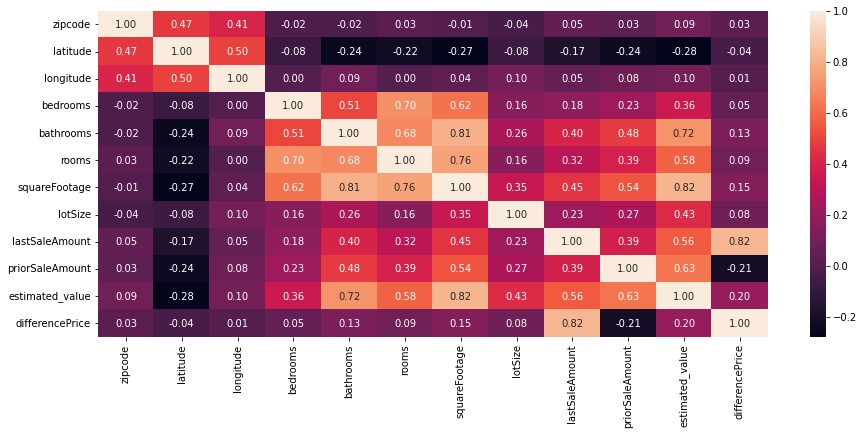

In [ ]:
plt.figure(figsize=(15,6))
x=sns.heatmap(ph2[ph2.columns.difference(['id','address','city','state'],sort=False)].corr(),annot=True,fmt=".2f")

**Nhận xét**
Nhìn chung, sự thay đổi của giá tương quan thuận rất nhẹ với số phòng ngủ, phòng khách, tổng số phòng, diện tích sàn, sân. Căn nhà có diện tích và số phòng nhiều hơn thì giá chênh lệch cũng nhiều hơn

# Tính tương quan theo từng nhóm nhà tăng giá, giảm giá, không đổi

In [ ]:
ph3=pd.get_dummies(ph2,columns=['pricestatus'])
ph3.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,differencePrice,pricestatus_dropped,pricestatus_growth,pricestatus_unchanged
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3.0,2.0,6.0,...,2003-01-01,2009-12-17,75000.0,2004-05-13,165700.0,239753,-90700.0,1,0,0
1,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3.0,5.0,7.0,...,1996-01-01,2006-09-12,363500.0,2005-05-16,339000.0,496062,24500.0,0,1,0
2,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4.0,4.0,8.0,...,1997-01-01,2014-12-15,420000.0,2006-07-07,345000.0,514953,75000.0,0,1,0
3,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3.0,3.0,7.0,...,1997-01-01,2004-03-15,328700.0,1998-04-09,225200.0,494321,103500.0,0,1,0
4,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3.0,3.0,0.0,...,2007-01-01,2015-12-01,407000.0,2012-10-30,312000.0,424514,95000.0,0,1,0


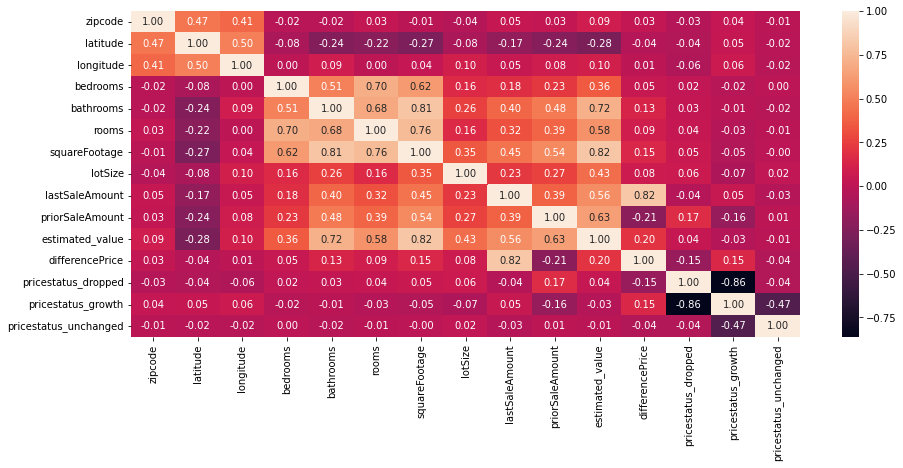

In [ ]:
plt.figure(figsize=(15,6))
z=sns.heatmap(ph3[ph3.columns.difference(['id','address','city','state'],sort=False)].corr(),annot=True,fmt=".2f")

- Các căn nhà có giá giảm so với lần bán trước tương quan thuận với số phòng ngủ và tổng số phòng, diện tích sàn và sân, như vậy nếu tăng thêm số lượng phòng, phòng ngủ thì sẽ tằng thêm số lượng nhà có giá bị giảm
- Các căn nhà có giá tăng tương quan thuận với zipcode, kinh độ, vĩ độ. Như vậy các căn nhà thuộc khu vực có kinh độ, vĩ độ lớn(phía Đông Bắc thành phố) đang có xu hướng tăng giá hơn

# So sánh giá bán giữa các phân loại nhà

Tạo bảng tính tổng giá nhà cho từng phân loại

In [ ]:
ph4=ph2.groupby('pricestatus').agg({'lastSaleAmount':['sum'],'priorSaleAmount':['sum'],'estimated_value':['sum'],'pricestatus':['count']})
ph4=ph4.reset_index()
ph4.columns=['_'.join(cl) for cl in ph4.columns]
ph4

,pricestatus_,lastSaleAmount_sum,priorSaleAmount_sum,estimated_value_sum,pricestatus_count
0,dropped,2.560277e+08,3.646531e+08,511785149,715
1,growth,4.116105e+09,2.495506e+09,5791845358,9054
2,unchanged,6.808408e+07,6.808408e+07,136252047,222


Giá trung bình với từng phân loại

In [ ]:
ph4['avg_LSA']=ph4['lastSaleAmount_sum']/ph4['pricestatus_count']
ph4['avg_PSA']=ph4['priorSaleAmount_sum']/ph4['pricestatus_count']
ph4['avg_EV']=ph4['estimated_value_sum']/ph4['pricestatus_count']
ph4small=ph4.drop(columns=['estimated_value_sum','priorSaleAmount_sum','lastSaleAmount_sum','pricestatus_count'])
ph4small

,pricestatus_,avg_LSA,avg_PSA,avg_EV
0,dropped,358080.766434,510004.401399,715783.425175
1,growth,454617.263861,275624.672189,639700.172079
2,unchanged,306685.049550,306685.049550,613747.959459


Đổi dạng hiển thị các cột thành dòng

In [ ]:
ph4long=ph4small.melt('pricestatus_',var_name='avg',value_name='price')
ph4long

,pricestatus_,avg,price
0,dropped,avg_LSA,358080.766434
1,growth,avg_LSA,454617.263861
2,unchanged,avg_LSA,306685.049550
3,dropped,avg_PSA,510004.401399
4,growth,avg_PSA,275624.672189
5,unchanged,avg_PSA,306685.049550
6,dropped,avg_EV,715783.425175
7,growth,avg_EV,639700.172079
8,unchanged,avg_EV,613747.959459


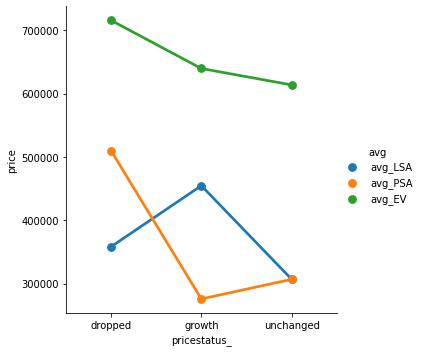

In [ ]:
sns.catplot(kind='point',data=ph4long,x='pricestatus_',y='price',hue='avg')

**Nhận xét:**
- Giá bán trung bình của các căn nhà thấp hơn nhiều so với giá trị trung bình
- Nhóm nhà tăng giá là nhóm có giá Sale trung bình kì trước thấp nhất trong 3 nhóm. Tới kì này nhóm này đã tăng giá Sale kéo giá Sale trung bình lên cao nhất trong 3 nhóm

# VỊ TRÍ CỦA CÁC CĂN NHÀ CÓ GIÁ TĂNG/GIẢM

In [ ]:
ph6=pricehouse2.groupby(['zipcode','pricestatus'])['id'].count().reset_index()
ph6.head()

,zipcode,pricestatus,id
0,80022,1stsale,1
1,80022,dropped,1
2,80033,1stsale,1
3,80033,nullPSA,1
4,80123,1stsale,57


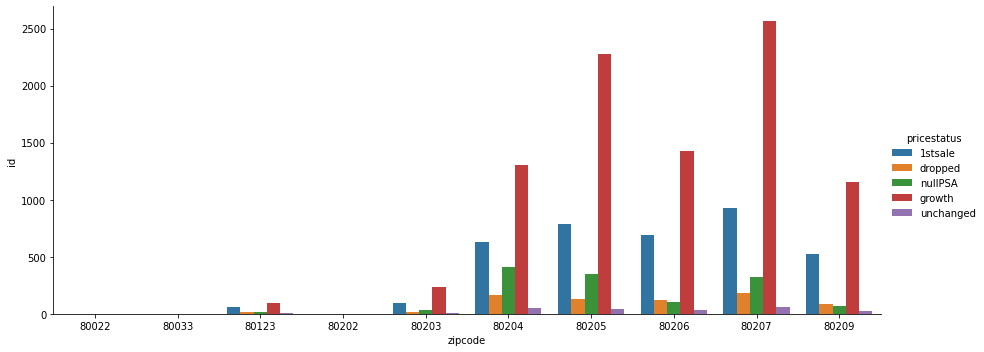

In [ ]:
sns.catplot(kind='bar',data=ph6,x='zipcode',y='id',hue='pricestatus',height=5,aspect=2.5)

**Nhận xét**
Các căn nhà có giá Sale tăng tập trung nhiều ở khu vực có zipcode 80207 và 80205
Các căn nhà có giá giảm nhiều nhất ở 80204 và 80207

# BEDROOM + BATHROOM CÓ BẰNG ROOM KHÔNG? ĐẶC ĐIỂM SỐ PHÒNG CÁC CĂN NHÀ TĂNG/GIẢM GIÁ

Đặt:
- typeA: là căn nhà có rooms > bedrooms + bathrooms
- typeB: là căn nhà có rooms = bedrooms + bathrooms
- typeC: là căn nhà có rooms < bedrooms + bathrooms

In [ ]:
bd = pricehouse2['bedrooms']
bt = pricehouse2['bathrooms']
r = pricehouse2['rooms']
conditions1=[((bd + bt)<r),((bd+bt)==r),((bd+bt)>r)]
values1=['typeA','typeB','typeC']
pricehouse2['typehouse']=np.select(conditions1,values1)
pricehouse2.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,pricestatus,typehouse
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3.0,2.0,6.0,1378,9968,2003-01-01,2009-12-17,75000.0,2004-05-13,165700.0,239753,dropped,typeA
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2.0,2.0,6.0,1653,6970,2004-01-01,2004-09-23,216935.0,NaT,0.0,343963,1stsale,typeA
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3.0,1.0,0.0,1882,23875,1917-01-01,2008-04-03,330000.0,NaT,0.0,488840,1stsale,typeC
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4.0,3.0,0.0,2400,11500,1956-01-01,2008-12-02,185000.0,2008-06-27,0.0,494073,nullPSA,typeC
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3.0,4.0,8.0,2305,5600,1998-01-01,2012-07-18,308000.0,2011-12-29,0.0,513676,nullPSA,typeA


In [ ]:
ph7=pricehouse2.groupby(['pricestatus','typehouse'])['id'].count().reset_index()
ph7.head()

,pricestatus,typehouse,id
0,1stsale,typeA,3007
1,1stsale,typeB,571
2,1stsale,typeC,134
3,dropped,typeA,571
4,dropped,typeB,118


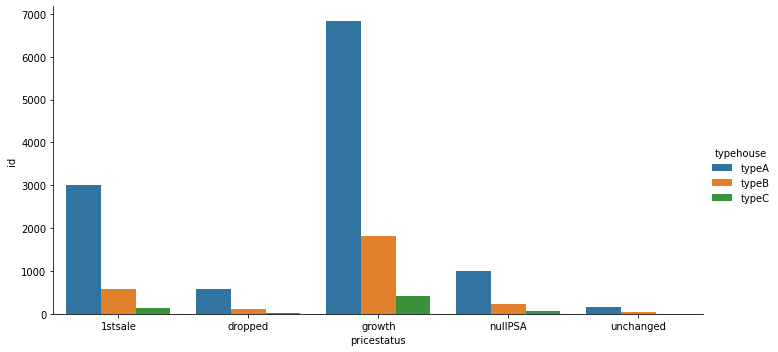

In [ ]:
sns.catplot(kind='bar',data=ph7,x='pricestatus',y='id',hue='typehouse',height=5,aspect=2)

Các nhóm giá đều có số lượng nhà có tổng số phòng lớn hoặc bằng số phòng tắm cộng phòng ngủ chiếm đa số. Đặc biệt loại nhà này nằm chủ yếu ở nhóm giá tăng và nhóm giá bán lần đầu.

# DIỆN TÍCH SÀN CÓ LUÔN NHỎ HƠN DIỆN TÍCH SÀN + SÂN KHÔNG? NHÓM NHÀ TĂNG HOẶC GIẢM GIÁ CÓ DIỆN TÍCH NHƯ THẾ NÀO?

So sách diện tích sàn với diện tích sàn + sân

In [ ]:
sf = pricehouse2['squareFootage']
ls = pricehouse2['lotSize']
pricehouse2.loc[sf <ls]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,pricestatus,typehouse
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3.0,2.0,6.0,1378,9968,2003-01-01,2009-12-17,75000.0,2004-05-13,165700.0,239753,dropped,typeA
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2.0,2.0,6.0,1653,6970,2004-01-01,2004-09-23,216935.0,NaT,0.0,343963,1stsale,typeA
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3.0,1.0,0.0,1882,23875,1917-01-01,2008-04-03,330000.0,NaT,0.0,488840,1stsale,typeC
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4.0,3.0,0.0,2400,11500,1956-01-01,2008-12-02,185000.0,2008-06-27,0.0,494073,nullPSA,typeC
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3.0,4.0,8.0,2305,5600,1998-01-01,2012-07-18,308000.0,2011-12-29,0.0,513676,nullPSA,typeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,51411356,802 S High St,Denver,CO,80209,39.701902,-104.964871,4.0,4.0,8.0,2169,4950,1922-01-01,2000-08-24,333000.0,NaT,0.0,1080081,1stsale,typeB
14995,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3.0,3.0,11.0,2937,4500,1890-01-01,2015-03-05,645000.0,2012-07-23,557500.0,807306,growth,typeA
14996,12995320,870 S Race St,Denver,CO,80209,39.700736,-104.963707,3.0,5.0,7.0,2937,4680,2007-01-01,2012-01-17,1115000.0,2008-07-15,1208214.0,1737156,dropped,typeC
14997,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3.0,4.0,10.0,3193,4970,2005-01-01,2011-08-10,1350000.0,2004-12-07,405000.0,2008794,growth,typeA


Có 14968 căn nhà có diện tích sân < diện tích sàn + sân, chỉ có 31 căn nhà có đặc điểm ngược lại.

In [ ]:
pricehouse2['lotSize'].describe()

count     14999.000000
mean       5820.841923
std        3013.365653
min         278.000000
25%        4620.000000
50%        5950.000000
75%        6270.000000
max      122839.000000
Name: lotSize, dtype: float64

50% số căn nhà có tổng diện tích sàn và sân nằm trong khoảng từ 4620 đến 6270

In [ ]:
pricehouse3=pricehouse2.copy()

Tổng diện tích sân sàn+sân theo từng nhóm nhà

In [ ]:
ph9=pricehouse3.groupby(['pricestatus']).agg({'squareFootage':['sum'],'lotSize':['sum'],'id':['count']}).reset_index()
ph9.columns=['_'.join(x) for x in ph9.columns]
ph9

,pricestatus_,squareFootage_sum,lotSize_sum,id_count
0,1stsale,5967827,22981449,3712
1,dropped,1185004,4455065,715
2,growth,13487063,50762634,9054
3,nullPSA,1747088,7773246,1296
4,unchanged,328676,1334414,222


Trung bình diện tích theo từng nhóm và so sánh

In [ ]:
ph9['avg_sf']=ph9['squareFootage_sum']/ph9['id_count']
ph9['avg_ls']=ph9['lotSize_sum']/ph9['id_count']
ph9=ph9.drop(columns=['squareFootage_sum','lotSize_sum','id_count'])
ph9

,pricestatus_,avg_sf,avg_ls
0,1stsale,1607.712015,6191.123114
1,dropped,1657.348252,6230.860140
2,growth,1489.624807,5606.652750
3,nullPSA,1348.061728,5997.875000
4,unchanged,1480.522523,6010.873874


In [ ]:
ph9long=ph9.melt('pricestatus_',var_name='avg_name',value_name='square')
ph9long

,pricestatus_,avg_name,square
0,1stsale,avg_sf,1607.712015
1,dropped,avg_sf,1657.348252
2,growth,avg_sf,1489.624807
3,nullPSA,avg_sf,1348.061728
4,unchanged,avg_sf,1480.522523
5,1stsale,avg_ls,6191.123114
6,dropped,avg_ls,6230.860140
7,growth,avg_ls,5606.652750
8,nullPSA,avg_ls,5997.875000
9,unchanged,avg_ls,6010.873874


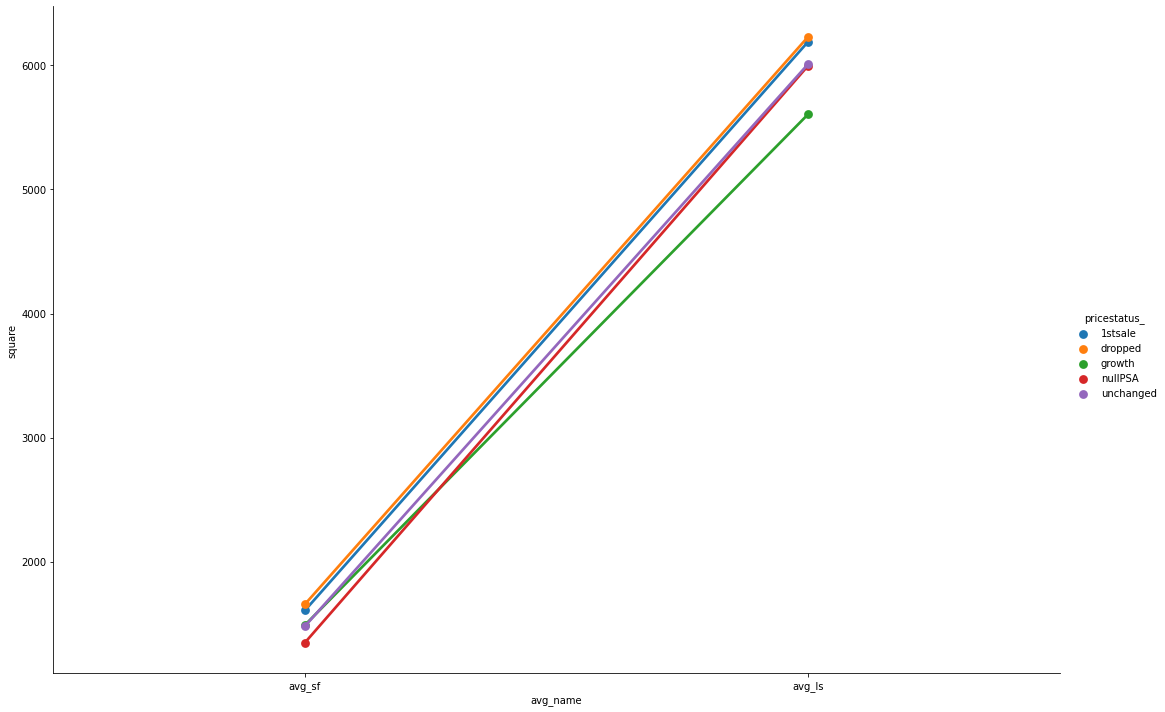

In [ ]:
sns.catplot(kind='point',data=ph9long,x='avg_name',y='square',hue='pricestatus_',height=10,aspect=1.5)

**Nhận xét**
Các căn nhà trong nhóm có giá tăng (growth) có diện tích sân trung bình ở giữa so với các nhóm và thấp hơn nhóm có giá giảm (dropped). Tuy nhiên, tổng diện tích trung bình của nhóm growth lại thấp nhất trong các nhóm và thấp hơn nhiều so với nhóm dropped

Chia nhóm diện tích, tìm khoảng diện tích phổ biến ở mỗi nhóm nhà

In [ ]:
conditions2=[(ls<2000),((ls>=2000) & (ls<3000)),((ls>=3000) & (ls<4000)),((ls>=4000) & (ls<5000)),((ls>=5000) & (ls<6000)),((ls>=6000) & (ls<8000)),(ls>=8000)]
value2=['<2000','2000-3000','3000-4000','4000-5000','5000-6000','6000-8000','>=8000']
pricehouse3['grouplotsize']=np.select(conditions2,value2)
pricehouse3.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,pricestatus,typehouse,grouplotsize
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3.0,2.0,6.0,...,9968,2003-01-01,2009-12-17,75000.0,2004-05-13,165700.0,239753,dropped,typeA,>=8000
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2.0,2.0,6.0,...,6970,2004-01-01,2004-09-23,216935.0,NaT,0.0,343963,1stsale,typeA,6000-8000
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3.0,1.0,0.0,...,23875,1917-01-01,2008-04-03,330000.0,NaT,0.0,488840,1stsale,typeC,>=8000
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4.0,3.0,0.0,...,11500,1956-01-01,2008-12-02,185000.0,2008-06-27,0.0,494073,nullPSA,typeC,>=8000
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3.0,4.0,8.0,...,5600,1998-01-01,2012-07-18,308000.0,2011-12-29,0.0,513676,nullPSA,typeA,5000-6000


In [ ]:
ph8=pricehouse3.groupby(['pricestatus','grouplotsize'])['id'].count().reset_index()
ph8.head()

,pricestatus,grouplotsize,id
0,1stsale,2000-3000,77
1,1stsale,3000-4000,396
2,1stsale,4000-5000,819
3,1stsale,5000-6000,462
4,1stsale,6000-8000,1512


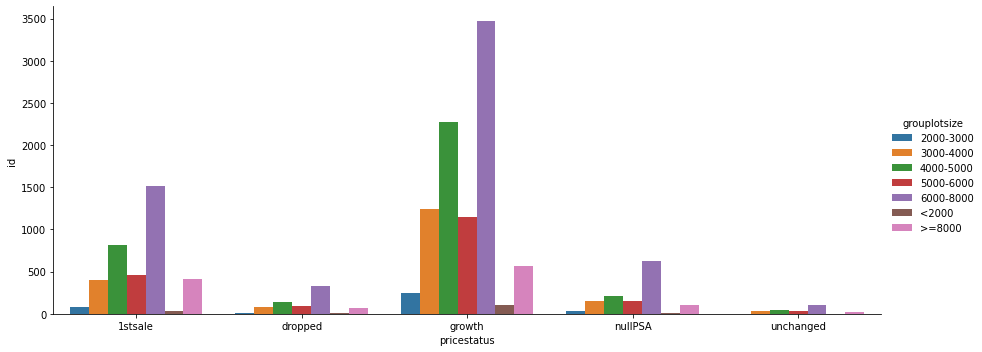

In [ ]:
sns.catplot(kind='bar',data=ph8,x='pricestatus',y='id',hue='grouplotsize',height=5,aspect=2.5)

**Nhận xét**
Nhóm growth và nhóm bán lần đầu tiên có tổng diện tích sàn+sân phổ biến ở mức 4000-5000 và 6000-8000, nhóm dropped cũng có số căn nhà ở 2 nhóm diện tích này cao nhất, tuy nhiên không khác biệt nhiều so với các nhóm diện tích khác cùng nhóm dropped

# NĂM BÁN SẢN PHẨM CÓ ẢNH HƯỞNG ĐẾN VIỆC TĂNG/GIẢM GIÁ KHÔNG?

In [ ]:
ph10=pricehouse3[['pricestatus','yearBuilt','lastSaleDate','priorSaleDate']].copy()
ph10.head()

,pricestatus,yearBuilt,lastSaleDate,priorSaleDate
0,dropped,2003-01-01,2009-12-17,2004-05-13
1,1stsale,2004-01-01,2004-09-23,NaT
2,1stsale,1917-01-01,2008-04-03,NaT
3,nullPSA,1956-01-01,2008-12-02,2008-06-27
4,nullPSA,1998-01-01,2012-07-18,2011-12-29


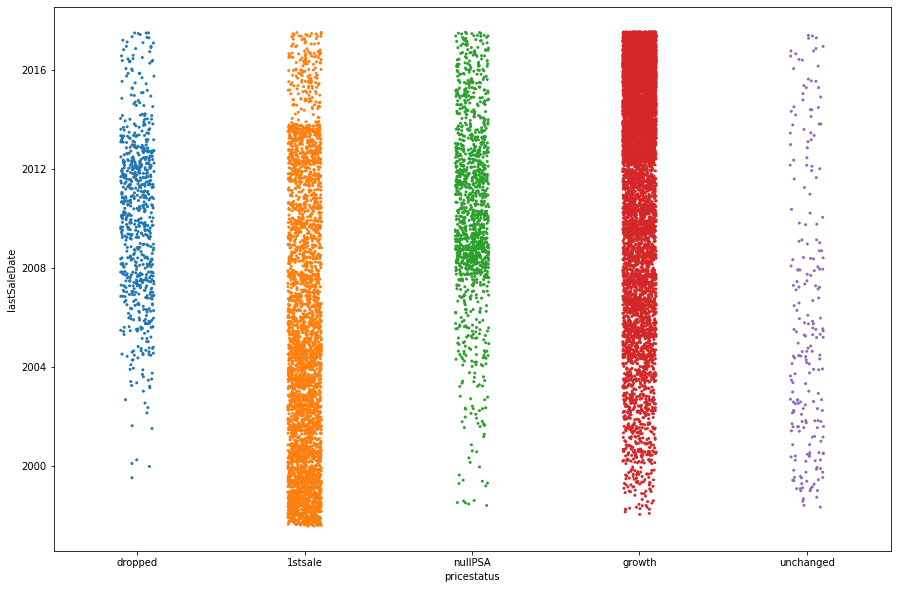

In [ ]:
fig, ax1=plt.subplots(figsize=(15,10))
sns.stripplot(data=ph10,y='lastSaleDate',x='pricestatus',size=3)

Các căn nhà trong nhóm tăng giá growth được bán chủ yếu ở khoảng năm 2012-2017, các năm kinh tế phát triển, còn các căn nhà giảm giá được bán chủ yếu ở khoảng năm 2005-2013 thời gian khủng hoảng về kinh tế, không có thông tin của đợt sale trước là các căn nhà bán trong thời gian 2008-2012

# TỔNG KẾT
Có khoảng 60% các căn nhà có giá bán tăng, 9& các căn nhà có giá bán giảm và 25& các căn nhà mới bán 1 lần duy nhất
Sự thay đổi giá nhà có tương quan thuận với số phòng, phòng ngủ, phòng tắm, diện tích nhưng ở mức nhỏ
Giá bán phần lớn đều thấp hơn nhiều giá trị căn nhà ở cả 2 lần bán

**ĐẶC ĐIỂM CỦA CÁC CĂN NHÀ TĂNG GIÁ:**
- Là các căn nhà có giá bán lần trước đó rất thấp, thấp hơn nhiều so với các căn thuộc nhóm giảm giá
- Chiếm số lượng nhiều hơn ở các khu vực có zipcode 80205 và 80207
- Chủ yếu các căn nhà ở nhóm này có tổng số phòng nhiều hơn số phòng ngủ + số phòng tắm
- Có tổng diện tích sàn+sân trung bình thấp nhất trong các nhóm, phổ biến ở khoảng 3000-4000 và 6000-8000
- Được bán chủ yếu ở các năm từ 2012-2017, giai đoạn phát triển của kinh tế thế giới

**ĐẶC ĐIỂM CỦA CÁC CĂN NHÀ GIẢM GIÁ:**
- Là các căn nhà có giá bán lần trước đó rất cao, cao hơn nhiều so với các nhóm còn lại
- Nằm chủ yếu khu vực zipcode 80204 và 80207
- Cũng như nhóm tăng giá, có tổng số phòng nhiều hơn số phòng ngủ + phòng tắm
- Có tổng diện tích sàn+sân trung bình cao nhất trong các nhóm, nằm phổ biến ở mức 6000-8000
- Được bán chủ yếu từ các năm 2005 đến 2013, giai đoạn suy thoái của kinh tế toàn thế giới
   